In [8]:
import math        #import needed modules
import pyaudio     #sudo apt-get install python-pyaudio
import sys

PyAudio = pyaudio.PyAudio     #initialize pyaudio

#See https://en.wikipedia.org/wiki/Bit_rate#Audio
BITRATE = 16000     #number of frames per second/frameset.      

FREQUENCY = 432    #Hz, waves per second, 261.63=C4-note.
LENGTH = 1     #seconds to play sound

if FREQUENCY > BITRATE:
    BITRATE = FREQUENCY+100

NUMBEROFFRAMES = int(BITRATE * LENGTH)
RESTFRAMES = NUMBEROFFRAMES % BITRATE
WAVEDATA = ''    

#generating wawes
for x in range(NUMBEROFFRAMES):
    WAVEDATA = WAVEDATA+chr(int(math.sin(x/((BITRATE/FREQUENCY)/math.pi))*127+128))    
   #math.sin((3*math.pi)/4)
        
for x in range(RESTFRAMES): 
    WAVEDATA = WAVEDATA+chr(128)

p = PyAudio()
stream = p.open(format = p.get_format_from_width(1), 
                channels = 1, 
                rate = BITRATE, 
                output = True)

stream.write(WAVEDATA)
stream.stop_stream()
stream.close()
p.terminate()

(-2.0, 2.0)

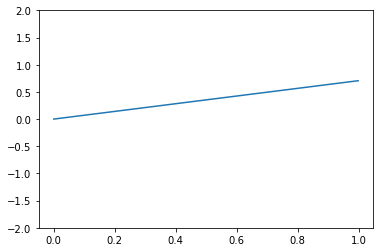

In [13]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 1, 500, endpoint=False)
c = t * np.sin((3*np.pi)/4) 
#plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.plot(t,c)
plt.ylim(-2, 2)

(-1.5, 1.5)

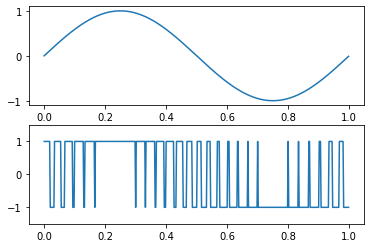

In [5]:
plt.figure()
sig = np.sin(2 * np.pi * t)
pwm = signal.square(2 * np.pi * 30 * t, duty=(sig + 1)/2)
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.subplot(2, 1, 2)
plt.plot(t, pwm)
plt.ylim(-1.5, 1.5)